# Introduction

The dataset includes information on several variables, including the number of people residing in each household, the size or square footage of the homes, and the corresponding monthly electricity consumption.

The analysis of the dataset, which focuses on the relationship between the number of people,use of T.V and A.C,income and home size with monthly electricity consumption in the household, aims to gain insights into how these factors influence energy usage.

 It allows homeowners to identify potential areas for improvement and implement energy-saving measures tailored to their specific household characteristics.

To conduct the analysis, statistical techniques such as regression analysis, correlation analysis, or data visualization methods can be employed. These approaches can help uncover insights, quantify relationships, and visualize the impact of the number of people and home size on monthly electricity consumption.


# Import libraries

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Machine Learning 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Read the dataset

In [28]:
df=pd.read_csv("./Household energy bill data.csv")
df

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625
...,...,...,...,...,...,...,...,...,...,...
995,3,0,991.31,0,1,0,12687.26,1,1,655.870111
996,2,5,847.97,0,1,0,39502.92,0,0,354.472693
997,2,4,660.94,1,0,0,10145.17,0,1,568.660550
998,1,1,814.75,0,1,1,15535.05,0,1,653.423314


**Summary about datas**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           1000 non-null   int64  
 1   num_people          1000 non-null   int64  
 2   housearea           1000 non-null   float64
 3   is_ac               1000 non-null   int64  
 4   is_tv               1000 non-null   int64  
 5   is_flat             1000 non-null   int64  
 6   ave_monthly_income  1000 non-null   float64
 7   num_children        1000 non-null   int64  
 8   is_urban            1000 non-null   int64  
 9   amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [30]:
print(df.columns)

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban', 'amount_paid'],
      dtype='object')


In [31]:
df.isnull().sum()

num_rooms             0
num_people            0
housearea             0
is_ac                 0
is_tv                 0
is_flat               0
ave_monthly_income    0
num_children          0
is_urban              0
amount_paid           0
dtype: int64

In [32]:
column_dtypes = df.dtypes
column_dtypes 

num_rooms               int64
num_people              int64
housearea             float64
is_ac                   int64
is_tv                   int64
is_flat                 int64
ave_monthly_income    float64
num_children            int64
is_urban                int64
amount_paid           float64
dtype: object

- Dataset has 1000 rows and 10 columns.
- All values are non-null. 
- Data type of most of the columns is int64.
- housearea, ave_monthly_income and amount_paid are in float64.

In [33]:
#To print the discrete values of columns in the household dataset 
disc_columns=[var for var in df if df[var].dtype =='int64']
print(disc_columns)
print("\nNo. of Discrete Values Numeric Columns : ",len(disc_columns))

['num_rooms', 'num_people', 'is_ac', 'is_tv', 'is_flat', 'num_children', 'is_urban']

No. of Discrete Values Numeric Columns :  7


In [34]:
#To print the continuous values of columns in the household dataset 
cont_columns=[var for var in df if df[var].dtype !='int64']
print(cont_columns)
print("\nNo. of Continuous Values Numeric Columns : ",len(cont_columns))

['housearea', 'ave_monthly_income', 'amount_paid']

No. of Continuous Values Numeric Columns :  3


**check the number of distinct num_rooms in dataset**

In [35]:
df['num_rooms'].unique()

array([ 3,  1,  0,  4,  2,  5, -1], dtype=int64)

**Find the unique value of the discrete value columns**

In [36]:
import pandas as pd
for column_name in disc_columns:
    unique_values = df[column_name].unique()
    print(f"Column '{column_name}' has unique values: {unique_values}")

Column 'num_rooms' has unique values: [ 3  1  0  4  2  5 -1]
Column 'num_people' has unique values: [ 3  5  1  8  4  6  7  2  9  0 10 11 -1]
Column 'is_ac' has unique values: [1 0]
Column 'is_tv' has unique values: [1 0]
Column 'is_flat' has unique values: [1 0]
Column 'num_children' has unique values: [2 1 0 3 4]
Column 'is_urban' has unique values: [0 1]


Number of rooms and number of people of a family can not happened -1.So i remove those rows from the dataset which contain -1 value in columns num_rooms and num_people.

In [37]:
data = df[(df['num_rooms'] != -1) & (df['num_people'] != -1)]
data

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625
...,...,...,...,...,...,...,...,...,...,...
995,3,0,991.31,0,1,0,12687.26,1,1,655.870111
996,2,5,847.97,0,1,0,39502.92,0,0,354.472693
997,2,4,660.94,1,0,0,10145.17,0,1,568.660550
998,1,1,814.75,0,1,1,15535.05,0,1,653.423314


In [38]:
import pandas as pd
for column_name in disc_columns:
    unique_values = data[column_name].unique()
    print(f"Column '{column_name}' has unique values: {unique_values}")

Column 'num_rooms' has unique values: [3 1 0 4 2 5]
Column 'num_people' has unique values: [ 3  5  1  8  4  6  7  2  9  0 10 11]
Column 'is_ac' has unique values: [1 0]
Column 'is_tv' has unique values: [1 0]
Column 'is_flat' has unique values: [1 0]
Column 'num_children' has unique values: [2 1 0 3 4]
Column 'is_urban' has unique values: [0 1]


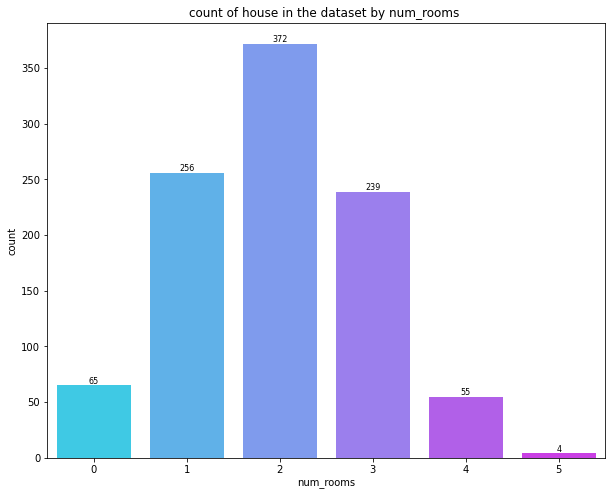

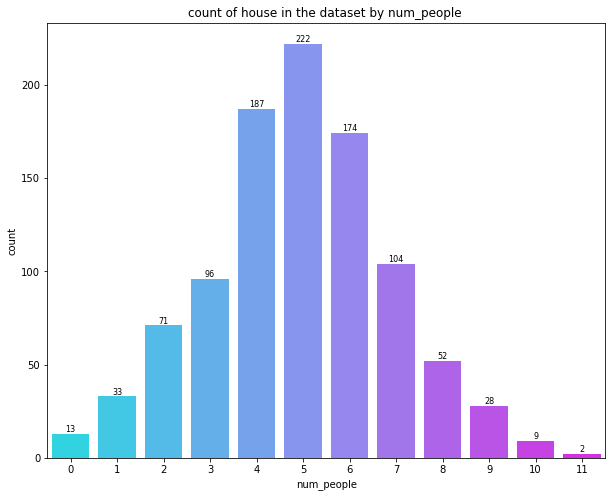

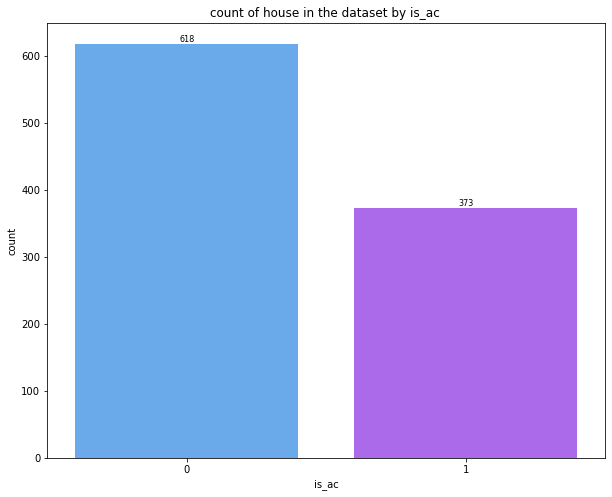

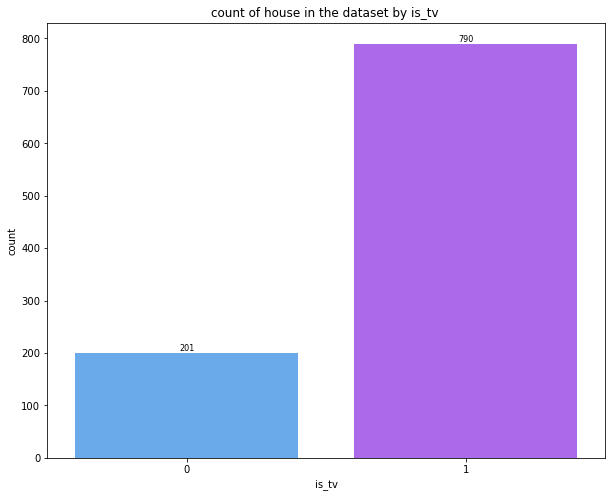

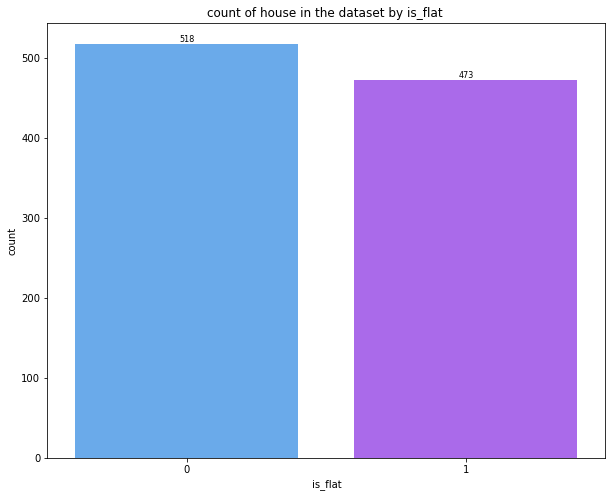

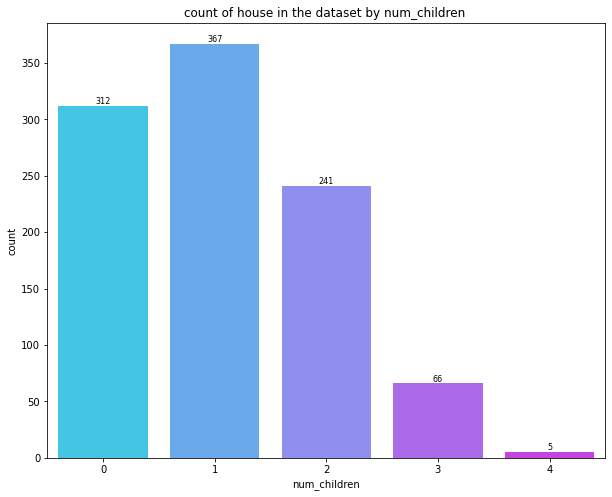

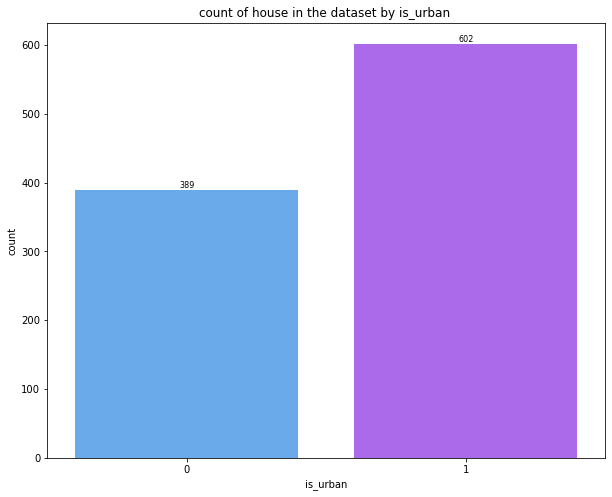

In [39]:
# Explore data analysis on discrete values column
discrete_values_columns = disc_columns
for feature in discrete_values_columns:
    plt.figure(figsize=(10, 8))  # Set the figure size (width=10, height=8)
    ax = sns.countplot(x=feature, data=data,palette='cool')
    plt.title("count of house in the dataset by {} ".format(feature))
    # Display count labels on top of each bar
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{int(count)}', (p.get_x() + p.get_width() / 2.0, count), ha='center', va='bottom', fontsize=8)
    #plt.savefig('house_{}.png'.format(feature))    
    plt.show()

In [40]:
total_samples = data.shape[0]
total_samples

991

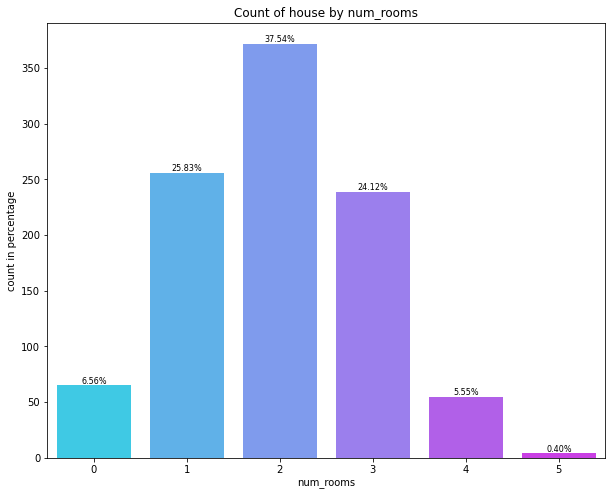

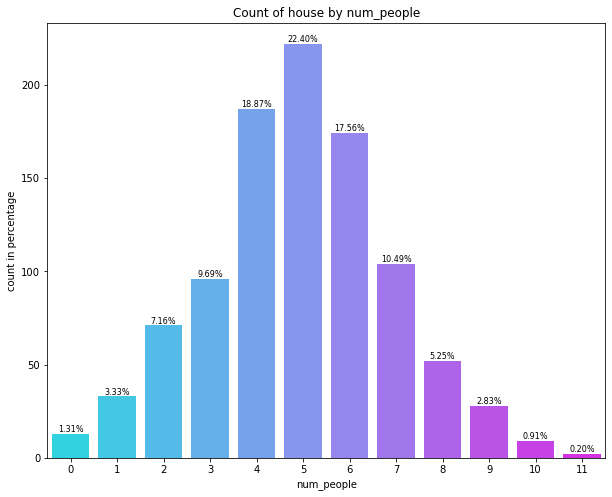

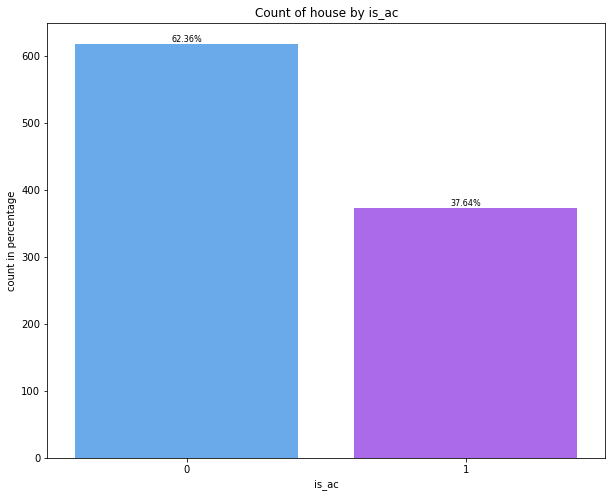

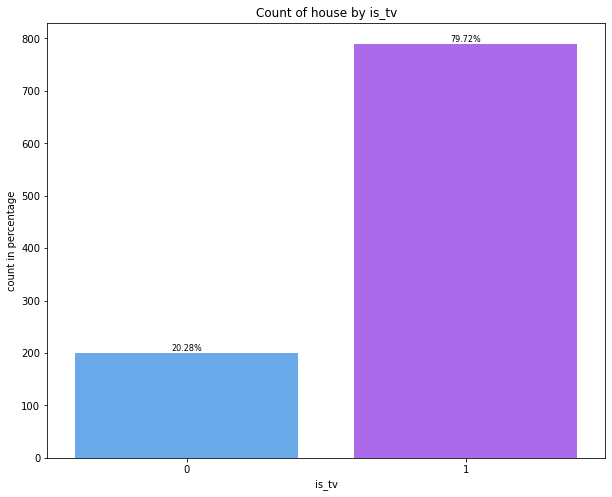

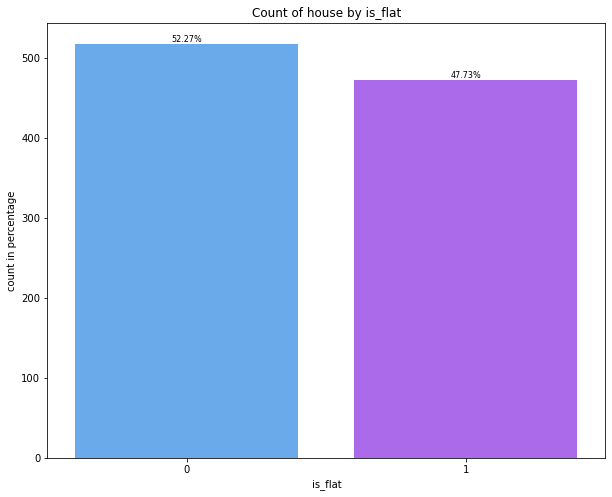

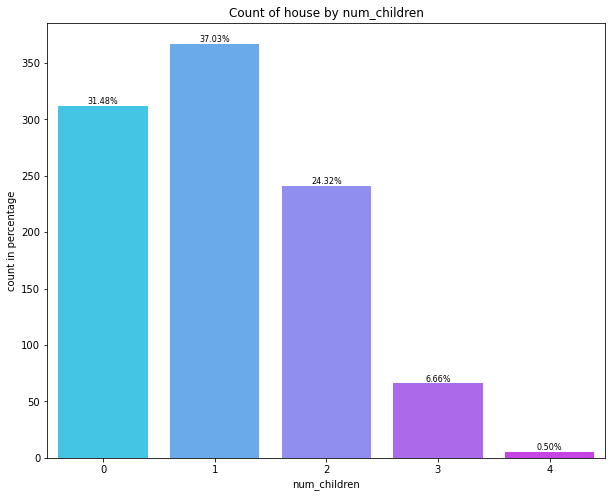

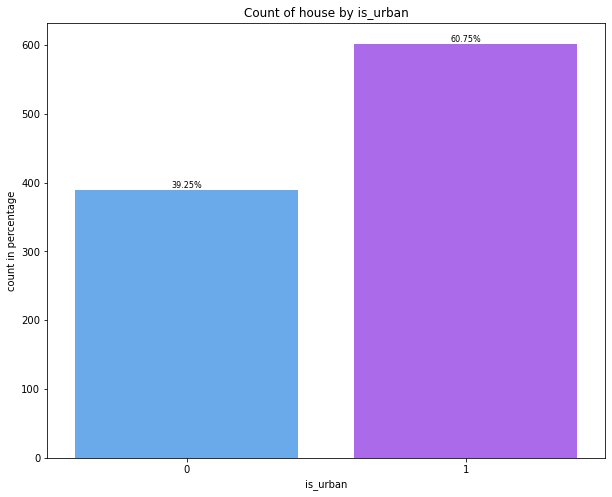

In [41]:
discrete_values_columns = disc_columns
total_samples = data.shape[0]  # Total number of samples in the dataset
for feature in discrete_values_columns:
    plt.figure(figsize=(10, 8))
    ax = sns.countplot(x=feature, data=data, palette='cool')
    plt.ylabel("count in percentage")
    plt.title("Count of house by {}".format(feature))

    # Display count and percentage labels on top of each bar
    for p in ax.patches:
        count = p.get_height()
        percentage = count / total_samples * 100  # Calculate percentage
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2.0, count),
                    ha='center', va='bottom', fontsize=8)
    #plt.savefig('house_{}.png'.format(feature))
    plt.show()

**continuous values column**

In [42]:
cont_columns

['housearea', 'ave_monthly_income', 'amount_paid']

In [43]:
#Maximum price of laptop
max_Price=data['housearea'].max()
print(max_Price)

1189.12


In [44]:
#Minimum price of the laptop
min_Price = data['housearea'].min()
min_Price

244.4

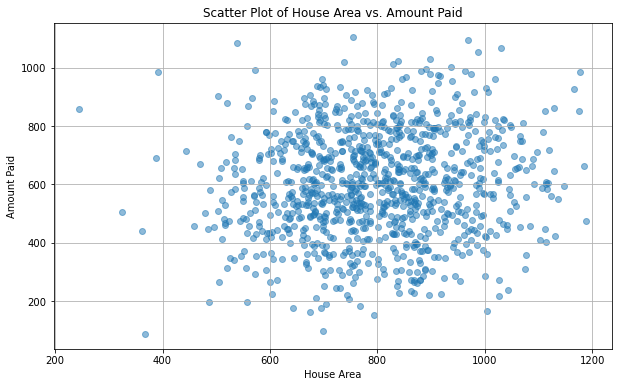

In [45]:
import matplotlib.pyplot as plt


# Extract the 'housearea' and 'amount_paid' columns from your DataFrame
house_area = data['housearea']
amount_paid = data['amount_paid']

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(house_area, amount_paid, alpha=0.5)  # 'alpha' controls transparency

# Set plot labels and title
plt.xlabel('House Area')
plt.ylabel('Amount Paid')
plt.title('Scatter Plot of House Area vs. Amount Paid')

# Show the plot
plt.grid(True)  # Add grid lines if desired
plt.show()

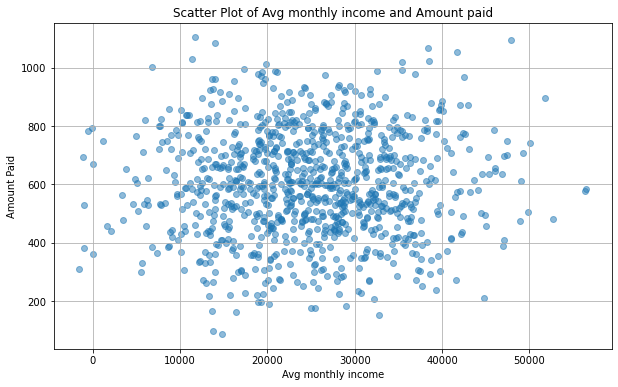

In [46]:
import matplotlib.pyplot as plt


# Extract the 'housearea' and 'amount_paid' columns from your DataFrame
house_area = data['ave_monthly_income']
amount_paid = data['amount_paid']

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(house_area, amount_paid, alpha=0.5)  # 'alpha' controls transparency

# Set plot labels and title
plt.xlabel('Avg monthly income')
plt.ylabel('Amount Paid')
plt.title('Scatter Plot of Avg monthly income and Amount paid')

# Show the plot
plt.grid(True)  # Add grid lines if desired
plt.savefig('house_scatter.png')
plt.show()

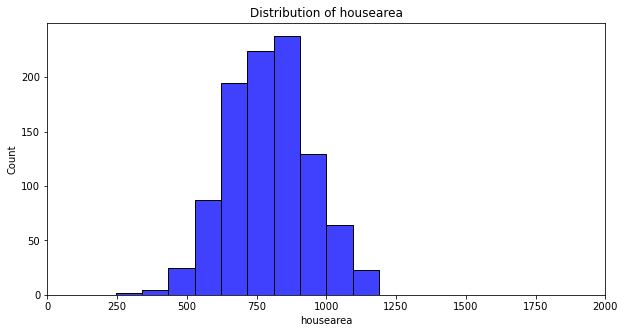

In [55]:
# Plotting the housearea
plt.figure(figsize=(10, 5))
sns.histplot(data.housearea, bins=10,color = 'blue')
plt.xlim(0, 2000)
max_price = data.housearea.max()
plt.title("Distribution of housearea")
# Save the picture
#plt.savefig('house_histogram.png')
plt.show()

In [56]:
#Maximum price of laptop
ave_monthly_income = data['ave_monthly_income'].max()
print(ave_monthly_income)

56531.08


In [57]:
#Minimum price of laptop
ave_monthly_income_min = data['ave_monthly_income'].min()
ave_monthly_income_min

-1576.44

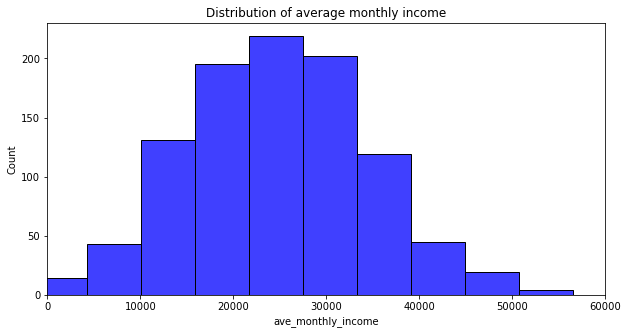

In [58]:
# Plotting the average monthly income 
plt.figure(figsize=(10, 5))
sns.histplot(data.ave_monthly_income, bins=10 ,color='blue')
plt.xlim(0, 60000)
max_price = data.ave_monthly_income.max()
plt.title("Distribution of average monthly income")
# Save the picture
#plt.savefig('house_histogram.png')
plt.show()

In [59]:
cont_columns = ['housearea', 'ave_monthly_income', 'amount_paid']

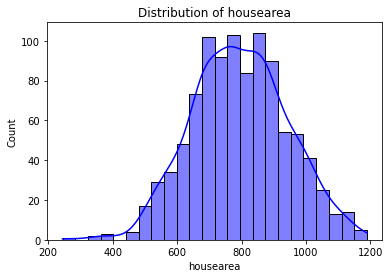

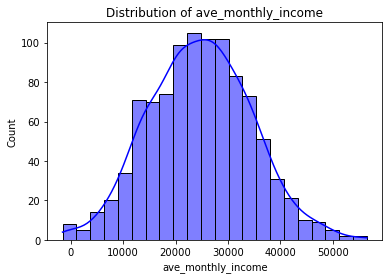

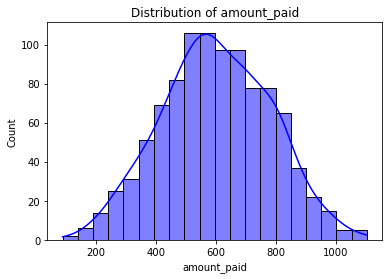

In [60]:
cont_columns = ['housearea', 'ave_monthly_income', 'amount_paid']
for feature in cont_columns:
    sns.histplot(x=feature, data = data,color='blue',kde= True)
    plt.title("Distribution of {}".format(feature))
    #plt.savefig('{}_histogram.png'.format(feature))
    plt.show()

`IQR (Inter Quartile Range)` approach to finding the outliers is the most commonly used and most trusted approach used in the research field. IQR focuses on the middle 50% of the data, which is the range between the 25th and 75th percentiles. To define outliers using the interquartile range (IQR), we can utilize a simple rule called the "1.5 times the IQR rule." According to this rule, any data point that falls below the lower quartile minus 1.5 times the IQR or above the upper quartile plus 1.5 times the IQR is considered an outlier.

Mathematically, the upper and lower outlier thresholds are calculated as:

Setting up IQR
$$Q3-Q1=IQR$$

And thus we can set up our lowest and highest boundaries:
* Lower boundary
$$Q1-1.5*IQR$$
* Highest boundary
$$Q3+1.5*IQR$$

Anything below or above lowest and highest boundaries respectively is considered an **OUTLIER**

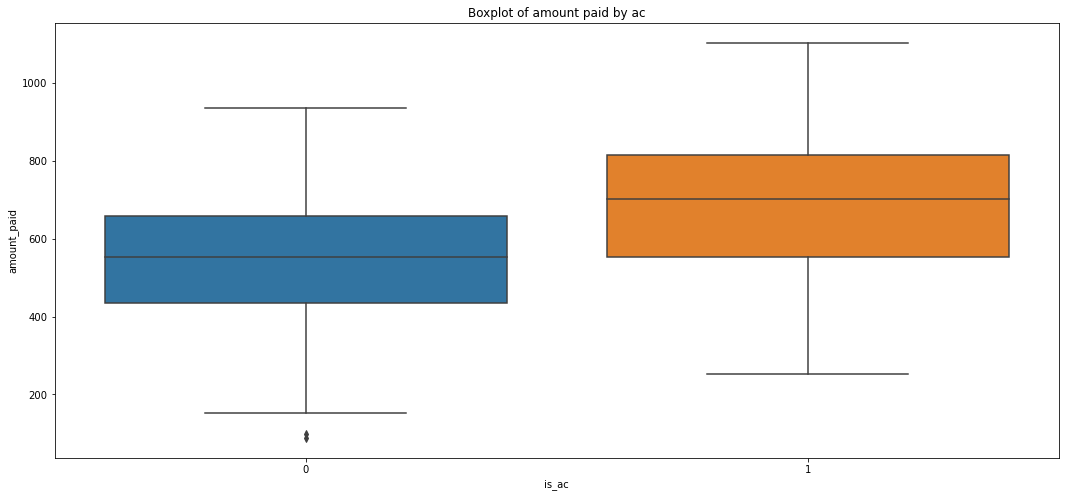

In [61]:
# Factors affecting the amount_paid of the house
plt.figure(figsize=(18,8))
sns.boxplot(x='is_ac',y='amount_paid',data=data)
plt.ylabel("amount_paid")
plt.title("Boxplot of amount paid by ac")
#plt.savefig('household_boxplot_ac.png')
plt.show()

- The boxplot shows the distribution of amount paid for different house based on their use of ac or not. Each box represents two values of is_ac, and the vertical lines (whiskers) extending from the box indicate the range of amount paid of house bill .
- The line inside the box represents the median price, while the lower and upper boundaries of the box indicate the 25th and 75th percentiles, respectively.
- The dots above or below the whiskers represent individual data points that are considered outliers, falling outside the typical range of amount paid of house bill. Outliers may indicate specific house with significantly higher or lower amount paid of house bill compared to the rest of the house bill.
- By comparing the positions and distributions of the boxes, we can observe amount paid of house bill differences among thethe houses.while use of ac seems to be the most expensive amount paid of house bill. 

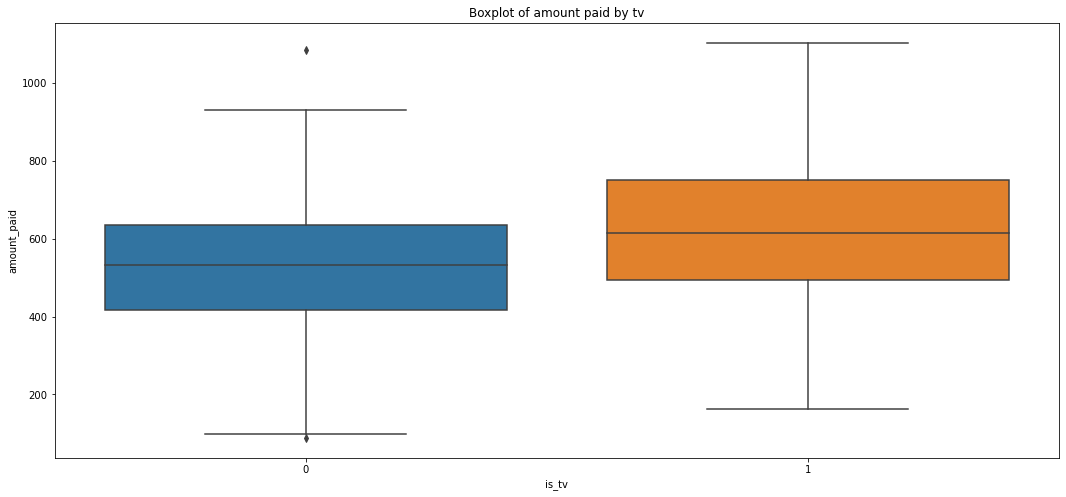

In [62]:
# Factors affecting the amount_paid of the house
#
plt.figure(figsize=(18,8))
sns.boxplot(x='is_tv',y='amount_paid',data=data)
plt.ylabel("amount_paid")
plt.title("Boxplot of amount paid by tv")
#plt.savefig('household_boxplot_tv.png')
plt.show()

- The boxplot shows the distribution of amount paid for different house based on their use of TV or not. Each box represents two values of is_tv, and the vertical lines (whiskers) extending from the box indicate the range of amount paid of house bill .
- The line inside the box represents the median price, while the lower and upper boundaries of the box indicate the 25th and 75th percentiles, respectively.
- The dots above or below the whiskers represent individual data points that are considered outliers, falling outside the typical range of amount paid of house bill. Outliers may indicate specific house with significantly higher or lower amount paid of house bill compared to the rest of the house bill.
- By comparing the positions and distributions of the boxes, we can observe amount paid of house bill differences among the houses.while use of tv seems to be the most expensive amount paid of house bill. 

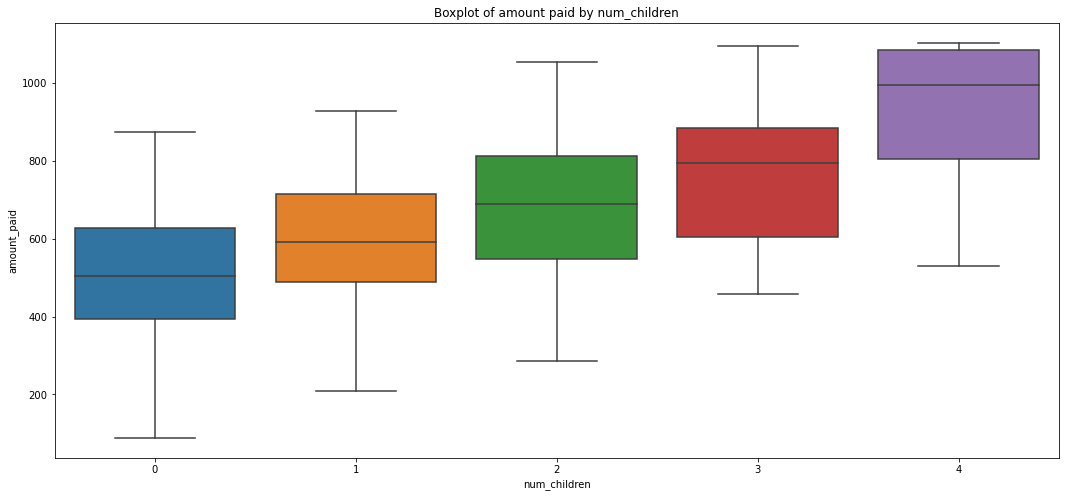

In [63]:
# Factors affecting the amount_paid of the house
#plotting with num_children
plt.figure(figsize=(18,8))
sns.boxplot(x='num_children',y='amount_paid',data=data)
plt.ylabel("amount_paid")
plt.title("Boxplot of amount paid by num_children")
#plt.savefig('num_children_boxplot.png')
plt.show()

- The boxplot shows the distribution of amount paid for different house based upon number of children of each house. Each box represents the different values of number of children in each house, and the vertical lines (whiskers) extending from the box indicate the range of amount paid of house bill .
- The line inside the box represents the median price, while the lower and upper boundaries of the box indicate the 25th and 75th percentiles, respectively.
- By comparing the positions and distributions of the boxes, we can observe amount paid of house bill differences among the number of children of each houses.while the house  where number of children is 4 be the most expensive amount paid of house bill. 

In [64]:
data.shape

(991, 10)

The scikit learn algorithms take two separate arguments. This means they need independent variables separately & the dependent variable (or target variable) separately. But since in the train dataset both independent & dependent variables are present together so I need to separate them out.

Firstly, I'll create a set of independent variables from the train dataset. So I'm dropping the 'target' variable from it using axis=1. This axis=1 specifies that the drop shall happen from the column. I'll store this set in an object called "X" as follows and I need my separate target variable. So keeping only the 'target' variable in an object Y

In [65]:
########## Split Features and Target Varible ############
X = data.drop(columns='amount_paid',axis = 1)
Y = data['amount_paid']

# Splitting Data Set
The data set will be split into 80% train and 20% test.

This split function accepts an independent variable 'X' & a dependent variable 'Y', and then split them into two parts. First is independent variable for train and independent variable for test. And then dependent variable for train and dependent variable for test. I'm naming them as X_train,X_test,Y_train & Y_test sets respectively as follows:

In [66]:
################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [67]:
X_train.shape

(792, 9)

In [68]:
X_test.shape

(199, 9)

In [69]:
Y_train.shape

(792,)

In [70]:
Y_test.shape

(199,)

# Linear Regression Model

**Import LinearRegression from sklearn.linear_model**

In [71]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

**Predict off the X_test set of the data.**

In [72]:
#We know how multiple linear regression equation is:
#y^ = b0 + b1x1 + b2x2 +.... so

Y_hatt_test = reg.predict(X_test)
#Y_hatt_test

**Create a scatterplot of the real test values versus the predicted values.**

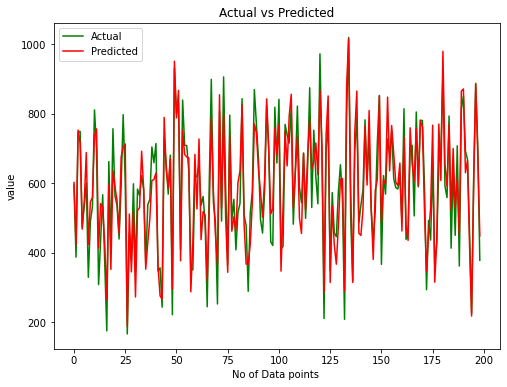

In [73]:
import matplotlib.pyplot as plt

# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(Y_test)), Y_test, color='green', label='Actual')
plt.plot(range(len(Y_hatt_test)), Y_hatt_test, color='r', label='Predicted')
plt.xlabel('No of Data points ')
plt.ylabel('value')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig('house_plot_1.png')
plt.show()

In [74]:
reg.score(X_test,Y_test)

0.8625962249106472

In [75]:
Test_dic = {"Expected": Y_test,"Prediction": Y_hatt_test }
Test_df = pd.DataFrame.from_dict(Test_dic)
Test_df

,Expected,Prediction
713,594.564967,601.933222
727,387.593826,422.704061
31,746.099760,752.756167
341,748.889205,714.768564
773,474.342420,468.132083
...,...,...
255,226.455643,218.518121
819,616.594251,591.993852
695,887.116791,884.671869
809,706.586897,687.457509


In [76]:
Test_df = Test_df.reset_index(drop=True)
Test_df

,Expected,Prediction
0,594.564967,601.933222
1,387.593826,422.704061
2,746.099760,752.756167
3,748.889205,714.768564
4,474.342420,468.132083
...,...,...
194,226.455643,218.518121
195,616.594251,591.993852
196,887.116791,884.671869
197,706.586897,687.457509


#  R^2 

 R-squared evaluates the scatter of the data points around the fitted regression line. Higher R-squared values represent smaller differences between the observed data and the fitted values.

R-squared is always between 0 and 100%:

In [77]:
y_actual = np.array(Test_df['Expected'])
y_pred = np.array(Test_df['Prediction'])
y_mean = y_actual.mean()
square_error = np.sum((np.subtract(y_actual,y_pred))**2)
mean_square_error = square_error/len(Test_df['Expected'])
total_square_error = np.sum((np.subtract(y_actual,y_mean))**2)/len(Test_df['Expected'])
r_square = 1-(mean_square_error/total_square_error)
r_square

0.8625962249106472

# Residuals

In [78]:
Test_df['residuals'] = Test_df['Expected'] - Test_df['Prediction']
Test_df

,Expected,Prediction,residuals
0,594.564967,601.933222,-7.368255
1,387.593826,422.704061,-35.110234
2,746.099760,752.756167,-6.656407
3,748.889205,714.768564,34.120641
4,474.342420,468.132083,6.210338
...,...,...,...
194,226.455643,218.518121,7.937522
195,616.594251,591.993852,24.600399
196,887.116791,884.671869,2.444922
197,706.586897,687.457509,19.129388


# Ridge regression model

**Import Ridge from sklearn.linear_model**

In [79]:
from sklearn.linear_model import Ridge
# Create a Ridge regression object
ridge_reg = Ridge(alpha=1.0)
# Fit the Ridge regression model to the training data
ridge_reg.fit(X_train, Y_train)

Ridge()

**Predict off the X_test set of the data.**

In [80]:
Y_hatt_test_r = ridge_reg.predict(X_test)

# R^2

 R-squared evaluates the scatter of the data points around the fitted regression line. Higher R-squared values represent smaller differences between the observed data and the fitted values.

R-squared is always between 0 and 100%:

In [81]:
ridge_reg.score(X_test,Y_test)

0.8628401832503297

**Create a scatterplot of the real test values versus the predicted values.**

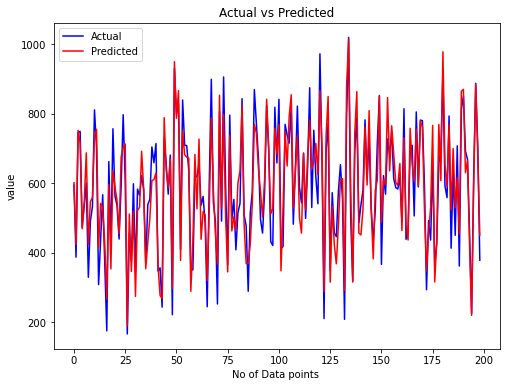

In [82]:
import matplotlib.pyplot as plt

# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(Y_test)), Y_test, color='blue', label='Actual')
plt.plot(range(len(Y_hatt_test_r)), Y_hatt_test_r, color='r', label='Predicted')
plt.xlabel('No of Data points ')
plt.ylabel('value')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig('house_plot_3.png')
plt.show()

In [83]:
Test_dic_r = {"Expected": Y_test,"Prediction": Y_hatt_test_r }
Test_df_r = pd.DataFrame.from_dict(Test_dic_r)
Test_df_r = Test_df_r.reset_index(drop=True)
Test_df_r

,Expected,Prediction
0,594.564967,601.532491
1,387.593826,423.606252
2,746.099760,752.152562
3,748.889205,714.828806
4,474.342420,469.212085
...,...,...
194,226.455643,220.485580
195,616.594251,591.711618
196,887.116791,883.849463
197,706.586897,686.815495


# Residuals

In [84]:
Test_df_r['residuals'] = Test_df_r['Expected'] - Test_df_r['Prediction']
Test_df_r

,Expected,Prediction,residuals
0,594.564967,601.532491,-6.967523
1,387.593826,423.606252,-36.012425
2,746.099760,752.152562,-6.052802
3,748.889205,714.828806,34.060399
4,474.342420,469.212085,5.130335
...,...,...,...
194,226.455643,220.485580,5.970062
195,616.594251,591.711618,24.882633
196,887.116791,883.849463,3.267328
197,706.586897,686.815495,19.771402


**Thank You**